Module ```galcol``` contains functions for setup, numerical integration, and visualization

In [1]:
import galcol

In [2]:
dir(galcol)

['Axes3D',
 'Circle',
 'FuncAnimation',
 'G',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'anim_disk_2d',
 'anim_disk_3d',
 'anim_orbits',
 'anim_two_disks_2d',
 'anim_two_disks_3d',
 'animation',
 'evolve_disk',
 'evolve_two_disks',
 'init_disk',
 'kpc',
 'np',
 'parameters',
 'plt',
 'show_disk_3d',
 'show_orbits',
 'show_two_disks_2d',
 'show_two_disks_3d',
 'unit']

#### Example: Whirlpool-like galaxy

This is an example for a nearly edge-on collision. A smaller intruder galaxy moves under an angle of 45° in the $xy$-plane with an impact velocity of about 130 km/s toward a larger, more massive target galaxy. The impact parameter is 6 kpc in $z$-direction.

First we define the parameters of the intruder and target galaxies.

In [3]:
import galcol
import astropy.units as unit

In [4]:
galaxies = {
    'intruder' : galcol.parameters(
        # mass in solar masses
        1e10, 
        # disk radius in kpc
        5, 
        # Cartesian coordinates (x,y,z) of initial position in kpc 
        (25,-25,-5), 
        # x-, y-, z-components of initial velocity in km/s
        (-75,75,0),
        # normal to galactic plane (disk is in xy-plane)
        (0,0,1), 
        # number of rings (each ring will be randomly populated with 1000/5 = 200 stars)
        5, 
        # total number of stars
        1000, 
        # softening factor defines inner edge of disk (in units of disk radius)
        0.025),
    'target' : galcol.parameters(5e10, 10, (-5,5,1), (15,-15,0), (1,-1,2**0.5), 10, 4000, 0.025),
}

In [5]:
galaxies['intruder']

{'mass': <Quantity 1.e+10 solMass>,
 'radius': <Quantity 5. kpc>,
 'center_pos': <Quantity [ 25., -25.,  -5.] kpc>,
 'center_vel': <Quantity [-75.,  75.,   0.] km / s>,
 'normal': (0, 0, 1),
 'N_rings': 5,
 'N_stars': 1000,
 'softening': 0.025}

In [6]:
galcol.init_disk(galaxies['intruder'])
galcol.init_disk(galaxies['target'])

Plane normal: phi = -45.0°, theta = 45.0°


The dictionaries of the two galaxies now contain additional items, particularly the inititial data of the stars.

In [7]:
galaxies['intruder']

{'mass': <Quantity 1.e+10 solMass>,
 'radius': <Quantity 5. kpc>,
 'center_pos': <Quantity [ 25., -25.,  -5.] kpc>,
 'center_vel': <Quantity [-75.,  75.,   0.] km / s>,
 'normal': (0, 0, 1),
 'N_rings': 5,
 'N_stars': 1000,
 'softening': 0.025,
 'stars_pos': <Quantity [[ 25.52292113,  25.68098829,  24.77577122, ...,  29.09762321,
              29.41896525,  24.43258417],
            [-24.57896313, -24.32229452, -24.69623798, ..., -26.35405499,
             -23.00694589, -20.93138717],
            [ -5.        ,  -5.        ,  -5.        , ...,  -5.        ,
              -5.        ,  -5.        ]] kpc>,
 'stars_vel': <Quantity [[-229.89505032, -222.5469927 , -355.32136709, ...,
              -43.56496722, -113.64090814, -176.35839302],
            [ 275.15681128,  226.63938208, -112.76246733, ...,
              169.75191106,  160.90158952,   60.99596764],
            [   0.        ,    0.        ,    0.        , ...,
                0.        ,    0.        ,    0.        ]] km / s>,


Solve equations of motion and visualize data.

In [8]:
t, data = galcol.evolve_two_disks(galaxies['target'], galaxies['intruder'], 
                                  N_steps=10000, N_snapshots=500, time_step=0.05*unit.Myr)

Solving equations of motion for two galaxies (Leapfrog integration)
100 % (stopped at t = 500.0 Myr)


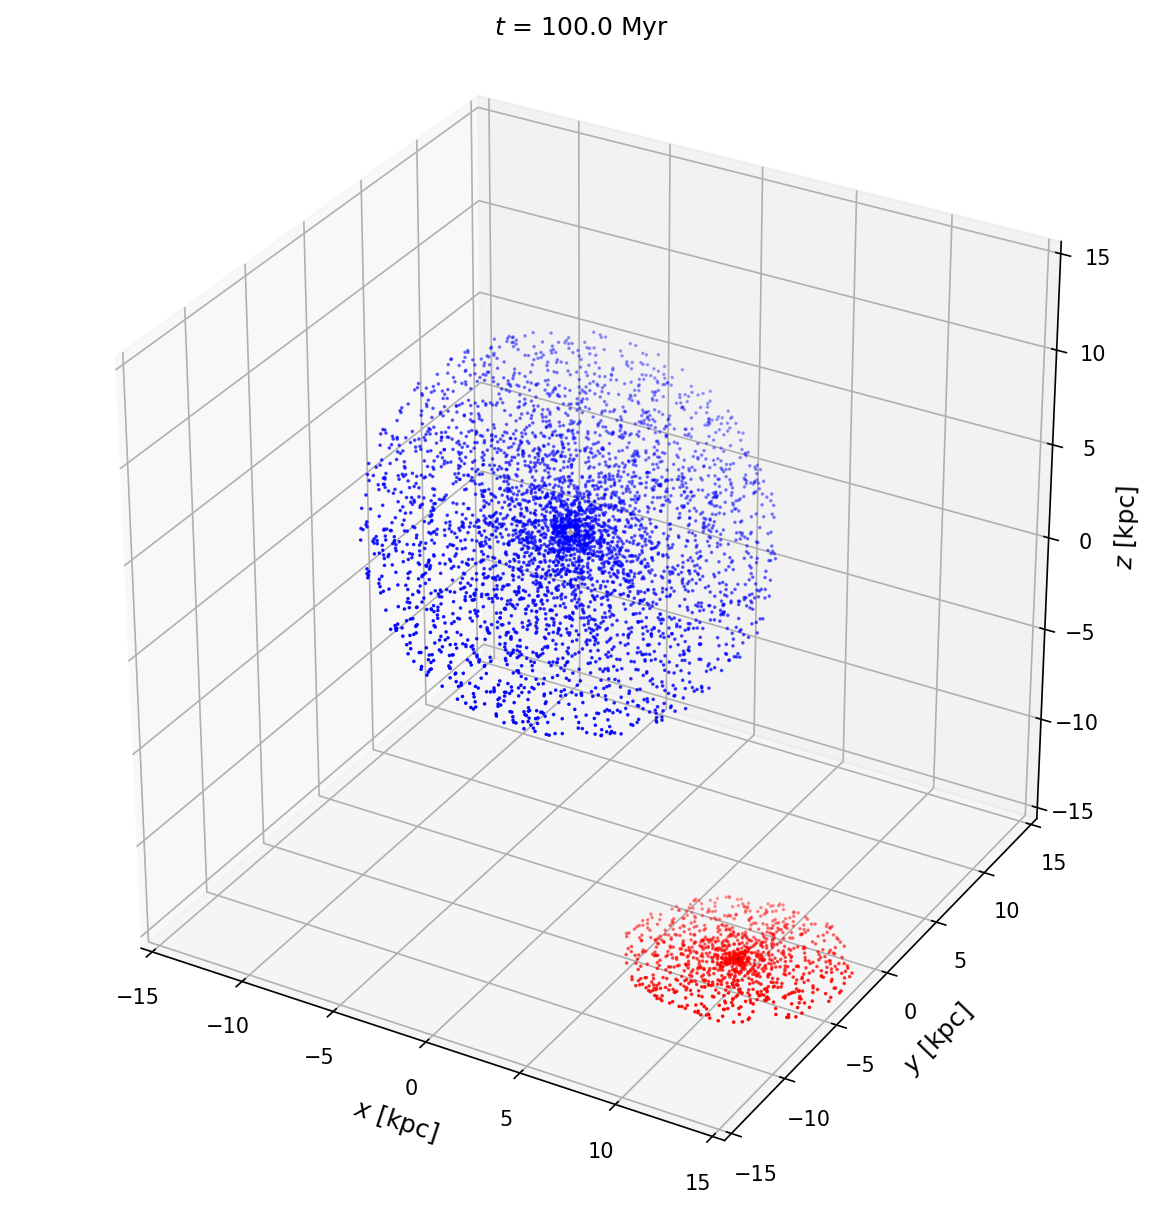

In [9]:
i = 100
galcol.show_two_disks_3d(data[i,:,:], galaxies['target']['N_stars'], 
                         [-15,15], [-15,15], [-15,15], t[i], name='two_disks')

Compute the evolution of an isolated disk in the x-y plane centered at
(0, 0, 0) using galcol.evolve_disk() </br>
</br>
First consider the case where the center is at rest. Visualize the time
evolution of the disk with galcol.anim_disk_2d(). Does the behavior of </br>
the disk meet your expectation? </br>
</br>
Since there are no perturbations of orbital motion by a second disk, the 
stars should follow circular Keplerian orbits. The function </br>
galcol.show_orbits() allows you to plot the numerically computed orbits 
of individual stars (the indices of these stars are passed as elements </br>
of an array to the function). Choose stars in the different rings and 
compare their motion over a given interval of time. Compute the disk </br>
evolution with different numerical timesteps. How are the orbits 
affected by the timestep, particularly in the innermost ring? </br>